In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

### to change according to your machine
base_dir = os.path.expanduser("/home/zj/senetial/data")
path_training = os.path.join(base_dir, 'training.h5')
path_validation = os.path.join(base_dir, 'validation.h5')

fid_training = h5py.File(path_training,'r')
fid_validation = h5py.File(path_validation,'r')

## we can have a look at which keys are stored in the file
## you will get the return [u'label', u'sen1', u'sen2']
## sen1 and sen2 means the satellite images
#print fid_training.keys()
#print fid_validation.keys()

### get s1 image channel data
### it is not really loaded into memory. only the indexes have been loaded.
print ("-" * 60)
#print "training part"
s1_training = fid_training['sen1']
#print s1_training.shape
s2_training = fid_training['sen2']
#print s2_training.shape
label_training = fid_training['label']
#print label_training.shape

#print "-" * 60
#print "validation part"
s1_validation = fid_validation['sen1']
#print s1_validation.shape
s2_validation = fid_validation['sen2']
#print s2_validation.shape
label_validation = fid_validation['label']
#print label_validation.shape

------------------------------------------------------------


In [2]:
## compute the quantity for each col
label_qty = np.sum(label_training, axis=0)

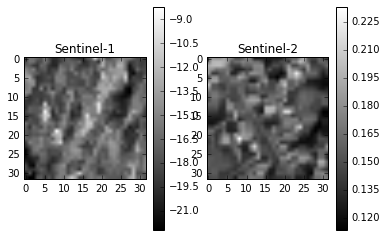

In [3]:
# visualization, plot the first pair of Sentinel-1 and Sentinel-2 patches of training.h5
import matplotlib.pyplot as plt
plt.plot(label_qty)

plt.subplot(121)
plt.imshow(10*np.log10(s1_training[0,:,:,4]),cmap=plt.cm.get_cmap('gray'));
plt.colorbar()
plt.title('Sentinel-1')

plt.subplot(122)
plt.imshow(s2_training[0,:,:,1],cmap=plt.cm.get_cmap('gray'));
plt.colorbar()
plt.title('Sentinel-2')

plt.show()

In [20]:
##统计每个类别的个数
from tqdm import tqdm
import numpy as np
num_classes={x:0 for x in range(17)}
for i in tqdm(range(352366)):
    #print(label_training[i])
    num_classes[int(np.argmax(label_training[i]))]+=1
print(num_classes)


100%|██████████| 352366/352366 [01:34<00:00, 3722.30it/s]

{0: 5068, 1: 24431, 2: 31693, 3: 8651, 4: 16493, 5: 35290, 6: 3269, 7: 39326, 8: 13584, 9: 11954, 10: 42902, 11: 9514, 12: 9165, 13: 41377, 14: 2392, 15: 7898, 16: 49359}


In [22]:
num_classes_val={x:0 for x in range(17)}
for i in tqdm(range(24119)):
    #print(label_training[i])
    num_classes_val[int(np.argmax(label_validation[i]))]+=1
print(num_classes_val)

100%|██████████| 24119/24119 [00:06<00:00, 3710.73it/s]

{0: 256, 1: 1254, 2: 2353, 3: 849, 4: 757, 5: 1906, 6: 474, 7: 3395, 8: 1914, 9: 860, 10: 2287, 11: 382, 12: 1202, 13: 2747, 14: 202, 15: 672, 16: 2609}


dict_values([5068, 24431, 31693, 8651, 16493, 35290, 3269, 39326, 13584, 11954, 42902, 9514, 9165, 41377, 2392, 7898, 49359])


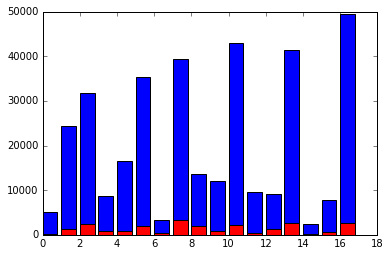

In [2]:
import matplotlib.pyplot as plt
num_classes_train={0: 5068, 1: 24431, 2: 31693, 3: 8651, 4: 16493, 5: 35290, 6: 3269, 7: 39326, 8: 13584, 9: 11954, 10: 42902, 11: 9514, 12: 9165, 13: 41377, 14: 2392, 15: 7898, 16: 49359}
num_classes_val={0: 256, 1: 1254, 2: 2353, 3: 849, 4: 757, 5: 1906, 6: 474, 7: 3395, 8: 1914, 9: 860, 10: 2287, 11: 382, 12: 1202, 13: 2747, 14: 202, 15: 672, 16: 2609}
print(num_classes_train.values())
#plt.subplot(211)
plt.bar(list(num_classes_train.keys()),list(num_classes_train.values()))
#plt.subplot(212)
plt.bar(list(num_classes_val.keys()),list(num_classes_val.values()),facecolor="red")
plt.show()

In [30]:
import numpy as np
weight=[float(num_classes_train[i])/sum(list(num_classes_train.values())) for i in range(17)]
weight2=[float(num_classes_val[i])/sum(list(num_classes_val.values())) for i in range(17)]
print(weight)
print([(weight[i]-weight2[i]) for i in range(17)])

[0.014382772458182685, 0.0693341582332007, 0.08994341111230936, 0.024551176901290137, 0.04680644557079854, 0.10015154697104715, 0.009277285549684135, 0.11160554650562199, 0.03855082499446598, 0.03392495303179081, 0.12175408524091427, 0.0270003348790746, 0.026009887446575435, 0.11742619889546664, 0.006788396156269334, 0.022414194332029763, 0.14007878172127844]
[0.0037687337335257746, 0.01734195291788912, -0.00761453075924419, -0.010649287462904066, 0.015420401373277916, 0.021126711778875013, -0.010375270526438423, -0.029154849862386645, -0.0408056989078517, -0.0017315833088535001, 0.026932575228061334, 0.011162198969625618, -0.02382634125279021, 0.003532588049245819, -0.0015867437749052587, -0.005447657320194626, 0.03190680112506798]


In [8]:






train_s1 = s1_training
train_s2 = s2_training
train_label = label_training

train_y = np.argmax(train_label, axis=1)#返回最大值对应的索引
classes = list(set(train_y))#set去掉重复的数据，构造迭代器，然后list构造
print(train_y.max())
print(classes)
print(train_s1.shape)
print(s2_validation.shape)


16
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
(352366, 32, 32, 8)
(24119, 32, 32, 10)


In [20]:
### simple classification example
### Training part

from sklearn.linear_model import SGDClassifier

train_s1 = s1_training
train_s2 = s2_training
train_label = label_training
clf = SGDClassifier()

train_y = np.argmax(train_label, axis=1)
classes = list(set(train_y))
batch_size = 100000         # 100000
n_sampels = train_s1.shape[0]#352366

for i in range(0, n_sampels, batch_size):
    ## this is an idea for batch training
    ## you can relpace this loop for deep learning methods
    if i % batch_size * 10 == 0:
        print("done %d/%d" % (i, n_sampels))#done 100000/352366
    start_pos = i
    end_pos = min(i + batch_size, n_sampels)#
    train_s1_batch = np.asarray(train_s1[start_pos:end_pos, :, :, :])
    train_s2_batch = np.asarray(train_s2[start_pos:end_pos, :, :, :])
    
    cur_batch_size = train_s2_batch.shape[0]
    
    train_s1_batch = train_s1_batch.reshape((cur_batch_size, -1))
    train_s2_batch = train_s2_batch.reshape((cur_batch_size, -1))
    
    train_X_batch = np.hstack([train_s1_batch, train_s2_batch])#
    label_batch = train_y[start_pos:end_pos]
    clf.partial_fit(train_X_batch, label_batch, classes=classes)

ImportError: No module named 'sklearn'

In [21]:
### make a prediction on validation
pred_y = []
train_val_y = np.argmax(label_validation, axis=1)
batch_size = 10000
n_val_samples = s2_validation.shape[0]
for i in range(0, n_val_samples, batch_size):
    start_pos = i
    end_pos = min(i + batch_size, n_val_samples)
    val_s1_batch = np.asarray(s1_validation[start_pos:end_pos, :, :, :])
    val_s2_batch = np.asarray(s2_validation[start_pos:end_pos, :, :, :])
    cur_batch_size = val_s2_batch.shape[0]
    val_s1_batch = val_s1_batch.reshape((cur_batch_size, -1))
    val_s2_batch = val_s2_batch.reshape((cur_batch_size, -1))
    val_X_batch = np.hstack([val_s1_batch, val_s2_batch])
    tmp_pred_y = clf.predict(val_X_batch)
    pred_y.append(tmp_pred_y)
pred_y = np.hstack(pred_y)

In [16]:
from sklearn.metrics import classification_report
print classification_report(train_val_y, pred_y)

             precision    recall  f1-score   support

          0       0.06      0.07      0.07       256
          1       0.07      0.06      0.07      1254
          2       0.04      0.04      0.04      2353
          3       0.08      0.13      0.10       849
          4       0.04      0.00      0.00       757
          5       0.16      0.02      0.03      1906
          6       0.00      0.00      0.00       474
          7       0.24      0.46      0.32      3395
          8       0.20      0.01      0.02      1914
          9       0.10      0.06      0.08       860
         10       0.67      0.58      0.62      2287
         11       0.02      0.01      0.01       382
         12       0.00      0.00      0.00      1202
         13       0.45      0.28      0.35      2747
         14       0.01      0.00      0.01       202
         15       0.06      0.30      0.10       672
         16       0.53      0.90      0.67      2609

avg / total       0.25      0.28      0.24  

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
